<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Case Study - Data Analysis of Student Performance

#### Name: Phua Yan Han

#### IC Number: 050824070059

#### Date : 5/7/23

#### Introduction : learn how to use pandas function and matplotlib



#### Conclusion : learned how to combine pandas and matplotlib






**Guideline EDA
link: https://medium.com/dataseries/an-eda-checklist-800beeaee555**

**Sample Exercise:**

High Student students academic performance

I'll do the dataset in Excel



**Randomizers in Excel (dont shoot me)**

I like to "visualize my simulated data" 

=RANDBETWEEN(0,100)

=CHOOSE(RANDBETWEEN(1,3),"B40","M40","T20")

**What data is needed?**

Describe the data

    Student demography
    Subjects taken
    Trial exam results
    attendance, contact Hours
    Final results
    Others? Sports activities


"Correlation is not causation"

Means that just because two things correlate does not necessarily mean that one causes the other. ... Correlations between two things can be caused by a third factor that affects both of them. This sneaky, hidden third wheel is called a confounder.


**Case Study Exercise**

Plot the Student Results table

Some basic stats

Look for Average, Min, Max


## Exploratory Data Analysis (EDA) Check list

- Domain knowledge
    - What is this dataset about?
- Check if the data is intuitive
- Find out how the data was generated
- Understand the process

----
- Select a smaller dataset 
    - depending on the data size, If what to go big bang, make sure enough resources.
- Explore individual features
- Explore pairs and groups

----

- Clean up features

- Selecting features of interest

- Generating derived feature(s)

- Extract , Transform and Load (the whole dataset)

- Sampling the data (in ML)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Data from CSV

In [11]:
path = '../Data files/student_performance.csv'
df = pd.read_csv(path)
df

,Student lD,Name,Term,lncomeGroup,NonsenseData,School,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
0,7,Psy,2,840,xvxc,SK 8estari,No,60,24,NaN,37,16,77
1,8,Edward,2,M40,sf,SK 8estari,Yes,30,43,28.0,22,34,127
2,6,Mei Lin,2,M40,dsf,SK 8estari,Yes,78,0,20.0,47,63,130
3,9,Miyazawa,2,T20,df,SK 8estari,No,100,32,94.0,33,1,160
4,4,Letchumi,2,T20,xvxc,SK 8estari,No,80,97,52.0,17,11,177
5,3,Muthu,2,T20,sf,SK 8estari,Yes,58,31,65.0,0,82,178
6,5,Ah Chong,2,840,dsf,SK 8estari,Yes,64,16,84.0,6,94,200
7,2,Siti,2,M40,df,SK 8estari,Yes,57,35,68.0,35,72,210
8,1,Ali,2,840,xvxc,SK 8estari,No,100,16,89.0,97,97,299
9,10,Ah Beng,2,T20,sf,SK 8estari,No,100,43,100.0,90,92,325


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student lD    20 non-null     int64  
 1   Name          20 non-null     object 
 2   Term          20 non-null     int64  
 3   lncomeGroup   20 non-null     object 
 4   NonsenseData  20 non-null     object 
 5   School        20 non-null     object 
 6   Tuisyen       20 non-null     object 
 7   Attendance    20 non-null     int64  
 8   BM            20 non-null     int64  
 9   BI            19 non-null     float64
 10  Maths         20 non-null     int64  
 11  Sejarah       20 non-null     int64  
 12  Total         20 non-null     int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.2+ KB


In [74]:
df.isnull().sum()

Student lD      0
Name            0
Term            0
lncomeGroup     0
NonsenseData    0
School          0
Tuisyen         0
Attendance      0
BM              0
BI              1
Maths           0
Sejarah         0
Total           0
dtype: int64

## 2. Data Cleaning - Remove Useless Data

In [12]:
df=df.drop(['NonsenseData', 'School'], axis=1).set_index('Student lD').sort_index()
df

,Name,Term,lncomeGroup,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
Student lD,,,,,,,,,,
1,Ali,2,840,No,100,16,89.0,97,97,299
1,Ali,1,840,No,100,6,79.0,87,87,259
2,Siti,2,M40,Yes,57,35,68.0,35,72,210
2,Siti,1,M40,Yes,57,25,58.0,25,62,170
3,Muthu,2,T20,Yes,58,31,65.0,0,82,178
3,Muthu,1,T20,Yes,58,21,55.0,10,72,158
4,Letchumi,2,T20,No,80,97,52.0,17,11,177
4,Letchumi,1,T20,No,80,87,42.0,7,1,137
5,Ah Chong,2,840,Yes,64,16,84.0,6,94,200


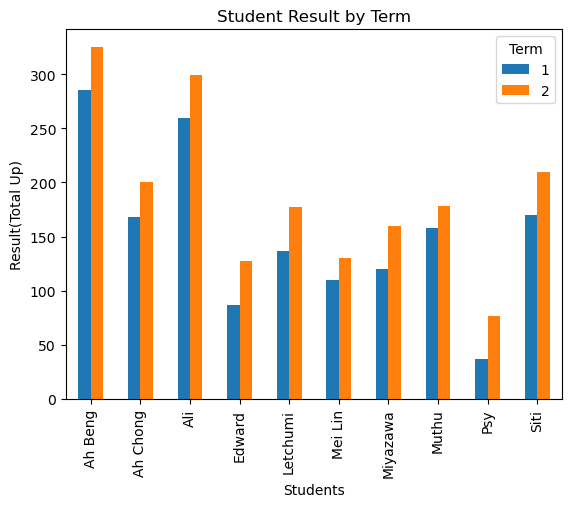

In [14]:
# temp =df[['Name','Total']].set_index('Name')
# temp
term = df.groupby(['Name', 'Term'])['Total'].sum().unstack()

term.plot.bar()
plt.xlabel('Students')
plt.ylabel('Result(Total Up)')
plt.title('Student Result by Term')
plt.show()

## 3. Basic Statistics of Table

In [77]:
df.describe()

,Term,Attendance,BM,BI,Maths,Sejarah,Total
count,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000
mean,1.500000,72.700000,29.700000,57.894737,34.800000,51.200000,170.700000
std,0.512989,22.571757,24.525175,31.985925,30.365493,36.685864,75.577844
min,1.000000,30.000000,0.000000,-10.000000,0.000000,-9.000000,37.000000
25%,1.000000,58.000000,15.500000,35.000000,11.500000,14.750000,125.250000
50%,1.500000,71.000000,24.500000,65.000000,26.000000,62.500000,164.000000
75%,2.000000,100.000000,33.500000,84.000000,39.500000,82.500000,202.500000
max,2.000000,100.000000,97.000000,100.000000,97.000000,97.000000,325.000000


### The top 3 and last 3 students each term

In [78]:
tempTerm1=df.sort_values(by=['Term', 'Total'], ascending=[True, False])
print(tempTerm1[tempTerm1['Term'] ==1].head(3))
print(tempTerm1[tempTerm1['Term'] ==1].tail(3))
print(tempTerm1[tempTerm1['Term'] ==2].head(3))
print(tempTerm1[tempTerm1['Term'] ==2].tail(3))

               Name  Term lncomeGroup Tuisyen  Attendance  BM    BI  Maths  \
Student lD                                                                   
10          Ah Beng     1         T20      No         100  33  90.0     80   
1               Ali     1         840      No         100   6  79.0     87   
2              Siti     1         M40     Yes          57  25  58.0     25   

            Sejarah  Total  
Student lD                  
10               82    285  
1                87    259  
2                62    170  
               Name  Term lncomeGroup Tuisyen  Attendance  BM    BI  Maths  \
Student lD                                                                   
6           Mei Lin     1         M40     Yes          78  10  10.0     37   
8            Edward     1         M40     Yes          30  33  18.0     12   
7               Psy     1         840      No          60  14 -10.0     27   

            Sejarah  Total  
Student lD                  
6              

### Average Scores for each term

In [81]:
df.groupby(['Term'])[['BI','BM','Maths','Sejarah','Total',]].mean()

,BI,BM,Maths,Sejarah,Total
Term,,,,,
1,50.000000,25.7,31.2,46.2,153.1
2,66.666667,33.7,38.4,56.2,188.3


### Max score for each subject

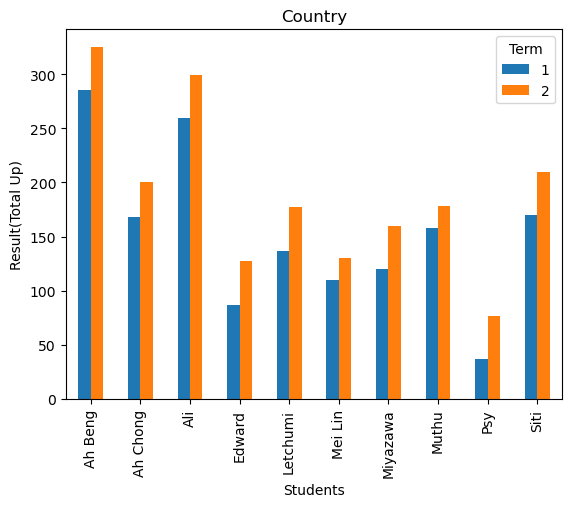

In [8]:
term = df.groupby(['Name', 'Term'])['Total'].sum().unstack()

term.plot.bar()
plt.xlabel('Students')
plt.ylabel('Result(Total Up)')
plt.title('Country')
plt.show()

### Type Markdown and LaTeX:  𝛼2

<Axes: xlabel='lncomeGroup'>

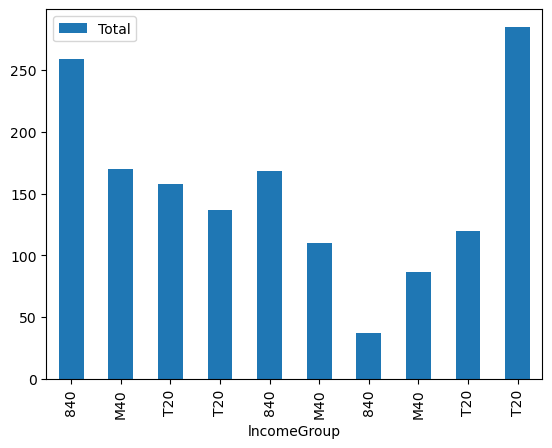

In [15]:
temp = df[df['Term']==1]
temp = temp[['Total','lncomeGroup']].set_index('lncomeGroup')
temp.plot(kind='bar')


C:\Users\Asus\AppData\Local\Temp\ipykernel_29956\4166321717.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subs = df.groupby('Term')['BI','BM','Maths','Sejarah'].mean().reset_index().set_index('Term')


<Axes: xlabel='Term'>

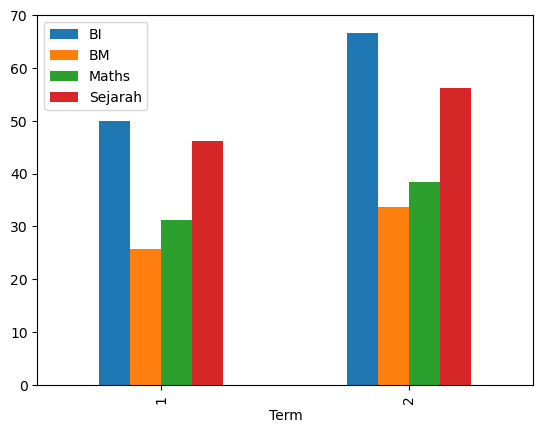

In [90]:
subs = df.groupby('Term')['BI','BM','Maths','Sejarah'].mean().reset_index().set_index('Term')
subs.plot(kind='bar')

C:\Users\Asus\AppData\Local\Temp\ipykernel_29956\651614195.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subs = df[df['Term']==1].groupby(['Tuisyen'])['BI','BM','Maths','Sejarah'].mean().reset_index().set_index('Tuisyen')


<Axes: xlabel='Tuisyen'>

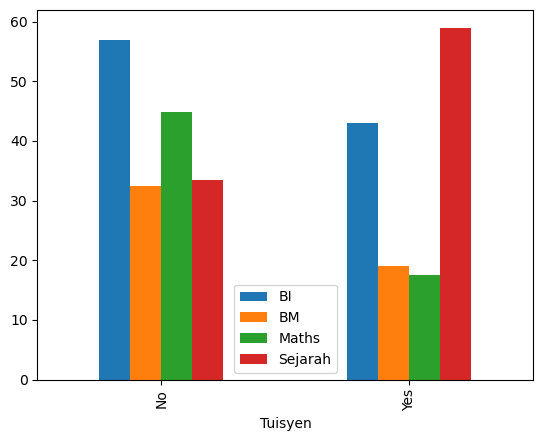

In [93]:
subs = df[df['Term']==1].groupby(['Tuisyen'])['BI','BM','Maths','Sejarah'].mean().reset_index().set_index('Tuisyen')
subs.plot(kind='bar')

## 4. Replace IncomeGroup and Tuisyen to Numerical Value 

In [98]:
numberIncome=[]
numberTuition=[]
for income in df['lncomeGroup']:
    if income == '840':
        numberIncome.append(1)
    elif income == 'M40':
        numberIncome.append(2)
    else:
        numberIncome.append(3)
for tuition in df['Tuisyen']:
    if tuition=='Yes':
        numberTuition.append(1)
    else:
        numberTuition.append(0)
df['lncomeGroup'] = numberIncome
df['Tuisyen'] = numberTuition
df

,Name,Term,lncomeGroup,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
Student lD,,,,,,,,,,
1,Ali,2,1,0,100,16,89.0,97,97,299
1,Ali,1,1,0,100,6,79.0,87,87,259
2,Siti,2,2,1,57,35,68.0,35,72,210
2,Siti,1,2,1,57,25,58.0,25,62,170
3,Muthu,2,3,1,58,31,65.0,0,82,178
3,Muthu,1,3,1,58,21,55.0,10,72,158
4,Letchumi,2,3,0,80,97,52.0,17,11,177
4,Letchumi,1,3,0,80,87,42.0,7,1,137
5,Ah Chong,2,1,1,64,16,84.0,6,94,200


## 5. Check the correlation between income group, tuisyen and result

In [99]:
df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_29956\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Term,lncomeGroup,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
Term,1.000000e+00,-4.009654e-17,-1.110223e-17,2.422280e-17,0.167335,0.267299,0.121636,0.139833,0.238922
lncomeGroup,-4.009654e-17,1.000000e+00,-1.203859e-01,2.259947e-01,0.565563,0.192207,-0.137483,-0.259916,0.129596
Tuisyen,-1.110223e-17,-1.203859e-01,1.000000e+00,-6.954474e-01,-0.322119,-0.335015,-0.506815,0.357972,-0.229420
Attendance,2.422280e-17,2.259947e-01,-6.954474e-01,1.000000e+00,-0.007587,0.588535,0.642941,0.100755,0.567749
BM,1.673347e-01,5.655634e-01,-3.221193e-01,-7.587030e-03,1.000000,0.018501,-0.219737,-0.427311,0.045778
BI,2.672994e-01,1.922070e-01,-3.350153e-01,5.885346e-01,0.018501,1.000000,0.379601,0.410982,0.799557
Maths,1.216355e-01,-1.374833e-01,-5.068146e-01,6.429414e-01,-0.219737,0.379601,1.000000,0.406545,0.681237
Sejarah,1.398329e-01,-2.599155e-01,3.579723e-01,1.007549e-01,-0.427311,0.410982,0.406545,1.000000,0.713688
Total,2.389221e-01,1.295962e-01,-2.294195e-01,5.677489e-01,0.045778,0.799557,0.681237,0.713688,1.000000


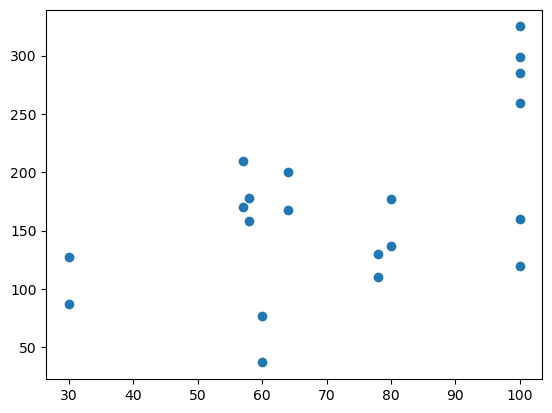

In [100]:
plt.scatter(df['Attendance'], df['Total'])


## 6. Conclusion

What is your finding?